In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import lag_plot
from pandas import datetime
from pandas import concat
from pandas import DataFrame
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet

/usr/lib/python3/dist-packages/matplotlib/__init__.py:880: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
data = pd.read_csv('/home/raghav/Desktop/sales-of-shampoo-over-a-three-ye.csv',na_values=['NA'],parse_dates=[0],squeeze=True)


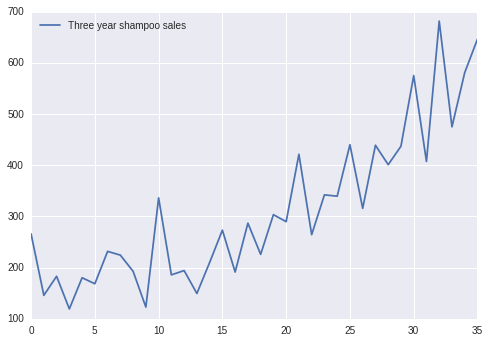

In [5]:
data.plot()
plt.show()

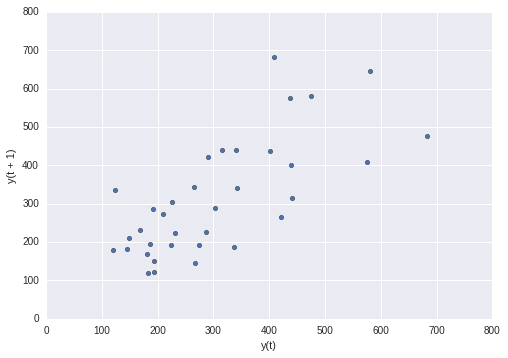

In [6]:
lag_plot(data['Three year shampoo sales'])
plt.show()

In [7]:
for i in range(1,11):
    values = DataFrame(data['Three year shampoo sales'].values)
    dataframe = concat([values.shift(i),values],axis=1)
    result = dataframe.corr()
    print(result)

          0         0
0  1.000000  0.719482
0  0.719482  1.000000
          0         0
0  1.000000  0.850743
0  0.850743  1.000000
          0         0
0  1.000000  0.754949
0  0.754949  1.000000
          0         0
0  1.000000  0.798898
0  0.798898  1.000000
          0         0
0  1.000000  0.797534
0  0.797534  1.000000
          0         0
0  1.000000  0.720113
0  0.720113  1.000000
          0         0
0  1.000000  0.744945
0  0.744945  1.000000
          0         0
0  1.000000  0.663472
0  0.663472  1.000000
          0         0
0  1.000000  0.687762
0  0.687762  1.000000
          0         0
0  1.000000  0.676003
0  0.676003  1.000000


/home/raghav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


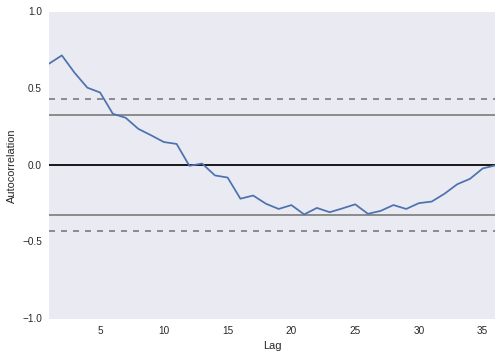

In [8]:
autocorrelation_plot(data['Three year shampoo sales'])
plt.show()

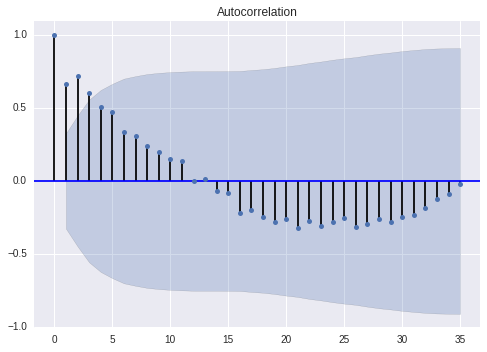

In [9]:
plot_acf(data['Three year shampoo sales'])

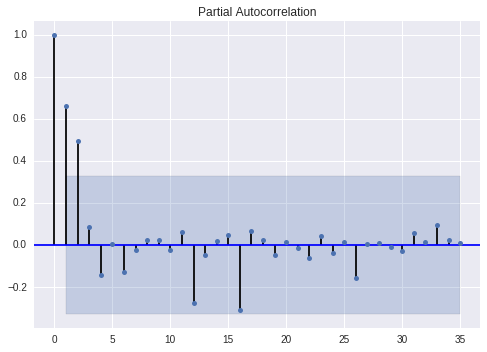

In [10]:
plot_pacf(data['Three year shampoo sales'])
#it also takes into account the intermediate values in between

In [11]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [71]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.2)
train = train.values
test = test.values

In [72]:
data = pd.read_csv('/home/raghav/Desktop/sales-of-shampoo-over-a-three-ye.csv', header=0, squeeze=True)

In [73]:
l = len(data['month'])
for i in range(l):
    data['month'][i] = datetime.strptime('190'+data['month'][i],'%Y-%m')


/home/raghav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
type(data['month'])

pandas.core.series.Series

In [75]:
data = data.set_index('month')

In [76]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -170.922
Method:                       css-mle   S.D. of innovations            133.108
Date:                Sun, 11 Mar 2018   AIC                            355.844
Time:                        21:45:46   BIC                            364.915
Sample:                             1   HQIC                           358.542
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0191      8.272      0.365      0.719     -13.193      19.231
ar.L1.D.y     -0.8020      0.201     -3.984      0.001      -1.197      -0.407
ar.L2.D.y     -0.5190      0.254     -2.047      0.0

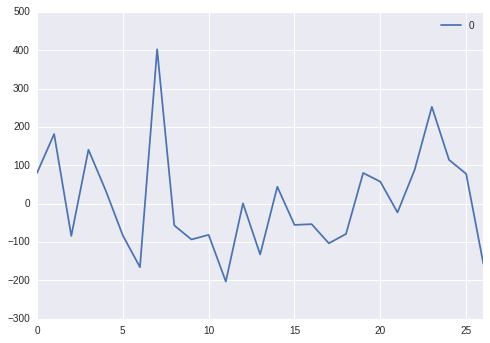

In [78]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# The given line plot of the residual error basically shows that now our function does not have any kind of trend or the seasonality . 

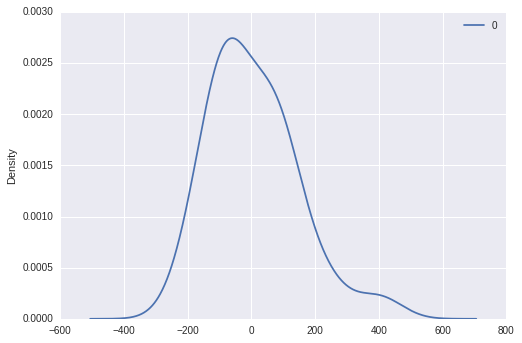

                0
count   27.000000
mean     6.954697
std    137.239052
min   -202.827126
25%    -83.256952
50%    -22.752681
75%     80.010961
max    402.512757


In [79]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# The given density plot of the residual function shows 

In [80]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=344.034612, expected=575.500000
predicted=400.761506, expected=646.900000
predicted=532.316041, expected=439.300000
predicted=441.538866, expected=401.300000
predicted=443.356302, expected=191.400000
predicted=517.228807, expected=226.000000
predicted=405.663744, expected=581.300000
predicted=470.431860, expected=231.800000


In [81]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 45065.124


In [82]:
model = ARIMA(train, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -173.278
Method:                       css-mle   S.D. of innovations            147.113
Date:                Sun, 11 Mar 2018   AIC                            354.557
Time:                        21:46:48   BIC                            359.740
Sample:                             1   HQIC                           356.098
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5409     16.046      0.158      0.876     -28.908      33.990
ar.L1.D.y     -0.6361      0.201     -3.157      0.004      -1.031      -0.241
ar.L2.D.y     -0.1651      0.200     -0.826      0.4

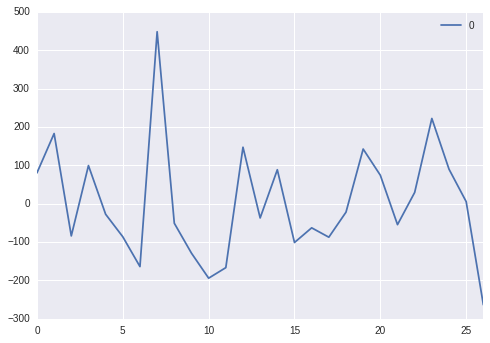

In [83]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# The given line plot of the residual error basically shows that now our function does not have any kind of trend or the seasonality . 

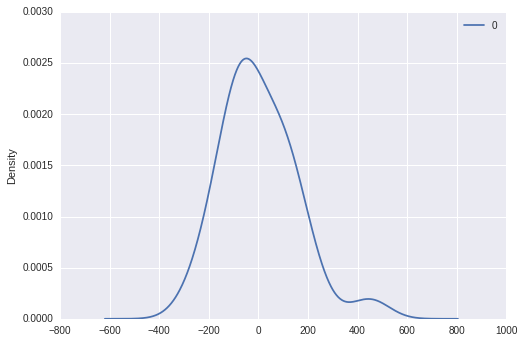

                0
count   27.000000
mean     2.966487
std    150.264398
min   -263.425134
25%    -86.740260
50%    -27.427874
75%     89.293090
max    448.316347


In [84]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# The given density plot of the residual function shows 

In [85]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=351.870129, expected=575.500000
predicted=359.913227, expected=646.900000
predicted=532.139218, expected=439.300000
predicted=576.099570, expected=401.300000
predicted=495.224444, expected=191.400000
predicted=320.035158, expected=226.000000
predicted=243.392521, expected=581.300000
predicted=382.600856, expected=231.800000


In [86]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 51202.500


In [87]:
model = ARIMA(train, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -170.772
Method:                       css-mle   S.D. of innovations            128.026
Date:                Sun, 11 Mar 2018   AIC                            351.543
Time:                        21:47:28   BIC                            358.023
Sample:                             1   HQIC                           353.470
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2509      3.711      0.068      0.947      -7.023       7.525
ar.L1.D.y      0.0735      0.197      0.374      0.712      -0.312       0.459
ar.L2.D.y      0.1566      0.200      0.785      0.4

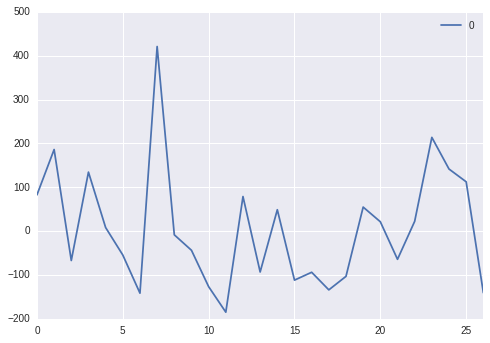

In [88]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# The given line plot of the residual error basically shows that now our function does not have any kind of trend or the seasonality . 

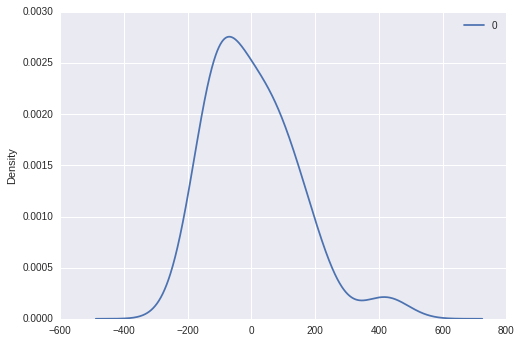

                0
count   27.000000
mean     5.869969
std    137.164980
min   -184.920190
25%    -98.524766
50%     -8.454636
75%     80.758494
max    421.049403


In [89]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# The given density plot of the residual function shows 

In [90]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=308.398272, expected=575.500000
predicted=295.611928, expected=646.900000
predicted=473.285398, expected=439.300000
predicted=494.776482, expected=401.300000
predicted=487.447990, expected=191.400000
predicted=347.058897, expected=226.000000
predicted=309.960022, expected=581.300000
predicted=405.933687, expected=231.800000


In [91]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 51360.887


In [92]:
model = ARIMA(train, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -169.531
Method:                       css-mle   S.D. of innovations            150.097
Date:                Sun, 11 Mar 2018   AIC                            349.061
Time:                        21:48:13   BIC                            355.352
Sample:                             2   HQIC                           350.873
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5063      2.343     -0.216      0.831      -5.099       4.087
ar.L1.D2.y    -0.5914      0.212     -2.795      0.011      -1.006      -0.177
ar.L2.D2.y    -0.1203      0.211     -0.571      0.5

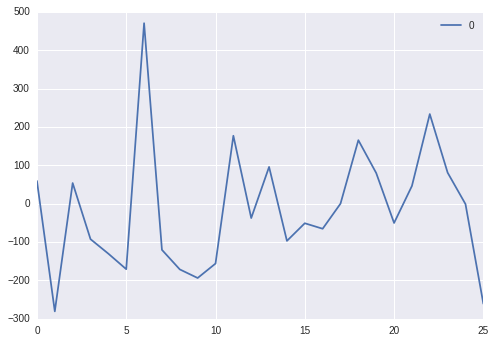

In [93]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# The given line plot of the residual error basically shows that now our function does not have any kind of trend or the seasonality . 

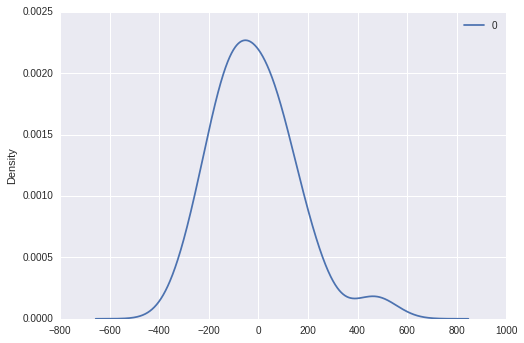

                0
count   26.000000
mean   -15.930702
std    165.665178
min   -280.645421
25%   -127.783419
50%    -43.803361
75%     74.745154
max    470.629638


In [94]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
# The given density plot of the residual function shows 

In [96]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=308.398272, expected=575.500000
predicted=295.611928, expected=646.900000
predicted=473.285398, expected=439.300000
predicted=494.776482, expected=401.300000
predicted=487.447990, expected=191.400000
predicted=347.058897, expected=226.000000
predicted=309.960022, expected=581.300000
predicted=405.933687, expected=231.800000


In [97]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 51360.887


In [98]:
data = pd.read_csv('/home/raghav/Desktop/sales-of-shampoo-over-a-three-ye.csv',na_values=['NA'],parse_dates=[0],squeeze=True)
l =len(data['month'])

In [99]:
for i in range(l):
    data['month'][i] = '190'+data['month'][i]
    data['month'][i] = datetime.strptime(data['month'][i],'%Y-%m')

/home/raghav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/raghav/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
data['month'] = pd.DatetimeIndex(data['month'])

In [101]:
data = data.rename(columns={'month': 'ds',
                        'Three year shampoo sales': 'y'})

In [102]:
train,test = train_test_split(data,test_size=0.3)

In [103]:
model = Prophet(interval_width=0.90)
model.fit(train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 19.0.


In [104]:
forecast = model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6,1902-08-01,254.071528,148.372429,362.933894
7,1902-09-01,435.819471,325.455805,545.579625
8,1903-01-01,452.949025,344.224810,565.308110
9,1903-11-01,520.173688,413.358495,622.339851
10,1903-12-01,490.464275,391.725989,598.086451


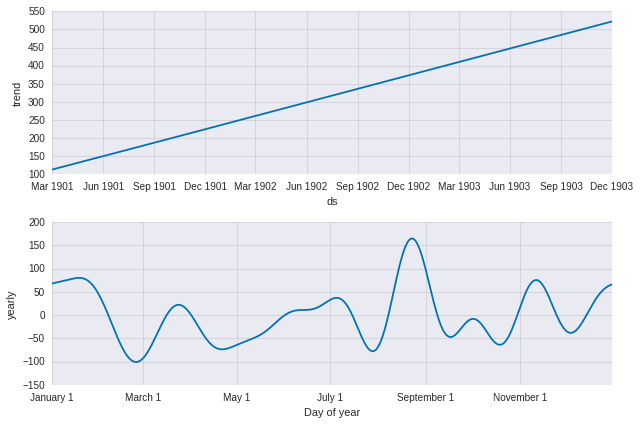

In [105]:
model.plot_components(forecast)

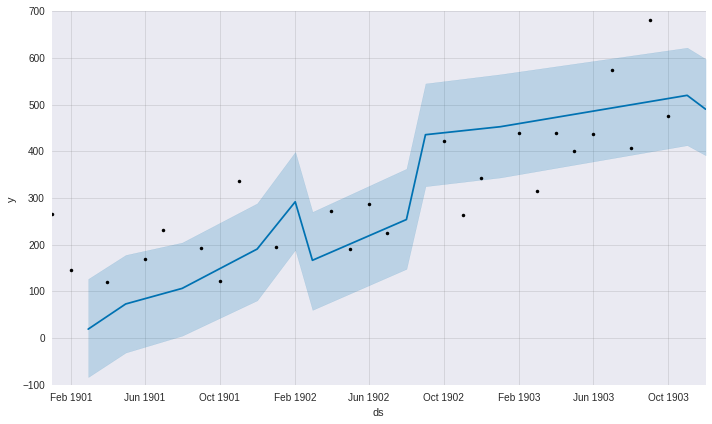

In [106]:
model.plot(forecast)

In [107]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['y'],forecast['yhat'])
print('Test MSE: %.3f' % error)

Test MSE: 59909.638


In [108]:
model = Prophet(interval_width=0.80)
model.fit(train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 19.0.


In [109]:
forecast = model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6,1902-08-01,254.071528,174.631935,337.358106
7,1902-09-01,435.819471,352.430230,518.158945
8,1903-01-01,452.949025,369.788744,538.573283
9,1903-11-01,520.173688,437.944224,601.128394
10,1903-12-01,490.464275,411.163392,573.998228


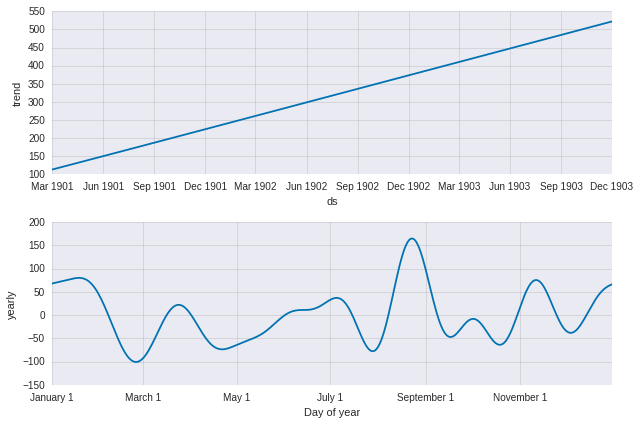

In [110]:
model.plot_components(forecast)

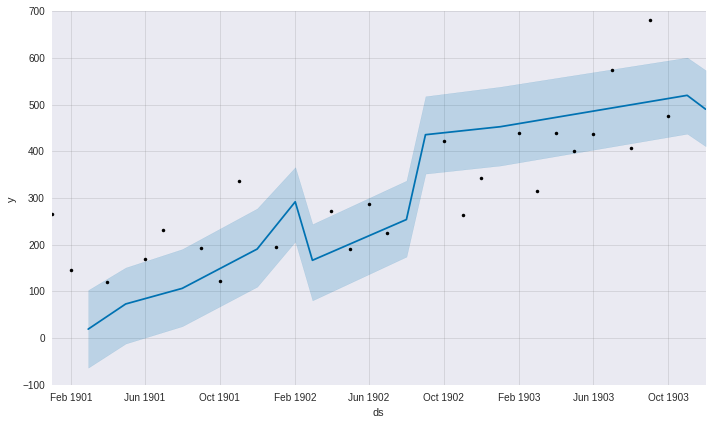

In [111]:
model.plot(forecast)

In [112]:
model = Prophet(interval_width=0.85)
model.fit(train)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 19.0.


In [113]:
forecast = model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6,1902-08-01,254.071528,164.933111,349.563923
7,1902-09-01,435.819471,340.859953,529.979133
8,1903-01-01,452.949025,359.234281,537.529953
9,1903-11-01,520.173688,429.087478,615.026000
10,1903-12-01,490.464275,396.187395,578.923907


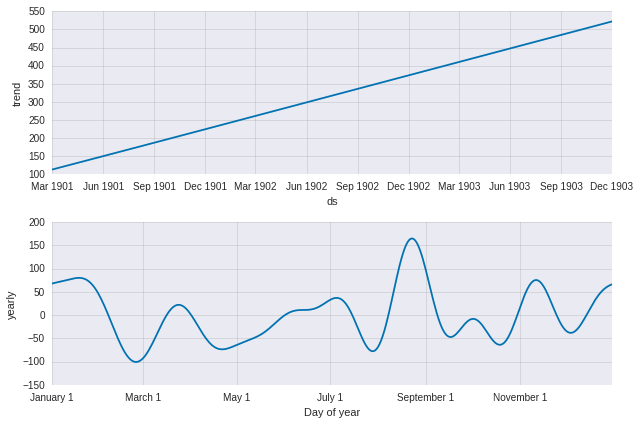

In [114]:
model.plot_components(forecast)

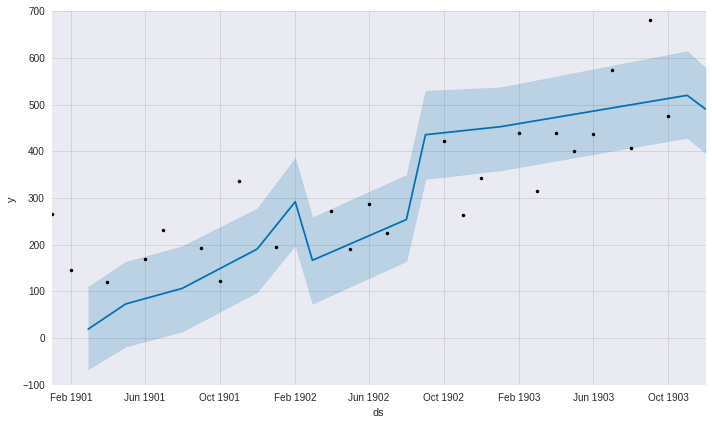

In [115]:
model.plot(forecast)